<a href="https://colab.research.google.com/github/Gupta7Nikhil/Data-Science-Python/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
# Load in the data
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [3]:
data 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target.shape

(569,)

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(data.data, data.target, test_size=0.33)

In [11]:
N, D=X_train.shape
N, D

(381, 30)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
model=tf.keras.models.Sequential(
  [ tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ]
      )

In [14]:
# Alternative WAY
# model=tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1,input_shape=(D,),activation='sigmoid'))

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
r=model.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.0228 - accuracy: 0.4488 - val_loss: 0.9071 - val_accuracy: 0.4894
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9246 - accuracy: 0.4987 - val_loss: 0.8260 - val_accuracy: 0.5213
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8346 - accuracy: 0.5407 - val_loss: 0.7551 - val_accuracy: 0.5691
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7587 - accuracy: 0.5774 - val_loss: 0.6912 - val_accuracy: 0.6170
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.6352 - val_loss: 0.6371 - val_accuracy: 0.6915
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.6877 - val_loss: 0.5909 - val_accuracy: 0.7234
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5770 - accuracy: 0.7323 - val_loss: 0.5505 - val_accuracy: 0.7606
Epoch 8/100


In [17]:
print("Train Score = ", model.evaluate(X_train,Y_train))
print("Test Score = ", model.evaluate(X_test,Y_test))


12/12 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9738
Train Score =  [0.1067877933382988, 0.9737532734870911]
6/6 [==============================] - 0s 5ms/step - loss: 0.1202 - accuracy: 0.9628
Test Score =  [0.12016136199235916, 0.9627659320831299]


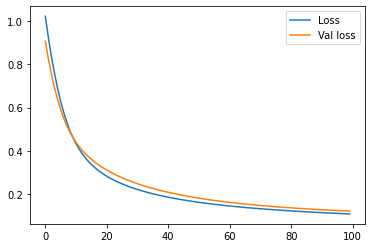

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Val loss')
plt.legend();


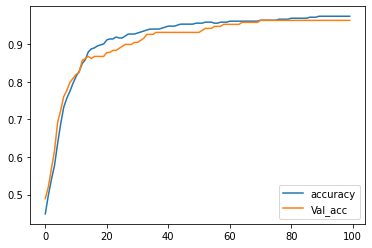

In [19]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='Val_acc')
plt.legend()